## Linear Regression

Linear Regression is one of the most fundamental algorithms in the Machine Learning world. It is the door to the magical world ahead. But before proceeding with the algorithm, let's first discuss the lifecycle of any machine learning model. This diagram explains the creation of a Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. A typical lifecycle diagram for a machine learning model looks like:

### What is Regression Analysis?

Regression in statistics is the process of predicting a Label(or Dependent Variable) based on the features(Independent Variables) at hand. Regression is used for time series modelling and finding the causal effect relationship between the variables and forecasting. For example, the relationship between the stock prices of the company and various factors like customer reputation and company annual performance etc. can be studied using regression.

Regression analysis is an important tool for analysing and modelling data, Here, we fit a curveЛline to the data points, in such a manner that the differences between the distance of the actual data points from the plotted curve/line is minimum. The topic will be explained in detail in the coming sections.

### The use of Regression

Regression analyses the relationship between two or more features. Let's take an example:

Let's suppose we want to make an application which predicts the chances of admission a student to a foreign university.

The benefits of using Regression analysis are as follows:

* It shows the significant relationships between the Lable (dependent variable) and the features(independent variable).
* It shows the extent of the impact of multiple independent variables on the dependent variable. 
* It can also measure these effects even if the variables are on a different scale.

These features enable the data scientists to find the best set of independent variables for predictions.

### Linear Regression

Linear Regression is one of the most fundamental and widely known Machine Learning Algorithms which people start with. Building blocks of a Linear Regression Model are:

* Discreet/continuous independent variables
* A best-fit regression line
* Continuous dependent variable. i.e., A Linear Regression model predicts the dependent variable using a regression line based on the independent variables. The equation of the Linear Regression is:

                                                        Y=a+b+X + e

Where, a is the intercept, b is the slope of the line, and e is the error term. The equation above is used to predict the value of the target variable based the given predictor variable(s).

## The Problem statement:

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?

In [1]:
#necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
data= pd.read_csv('G:\datatrained\Advertising.csv') # Reading the data file

In [3]:
data.head() # checking the first five rows from the dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### What are the features?  

* TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)

* Radio: Advertising dollars spent on Radio

* Newspaper: Advertising dollars spent on Newspaper

What is the response?

* Sales: sales of a single product in a given market (in thousands of widgets)

In [4]:
data.shape

(200, 5)

In [5]:
data.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isna().sum() # finding the count of missing values from different columns

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Now, let's showcase the relationship between the feature and target column

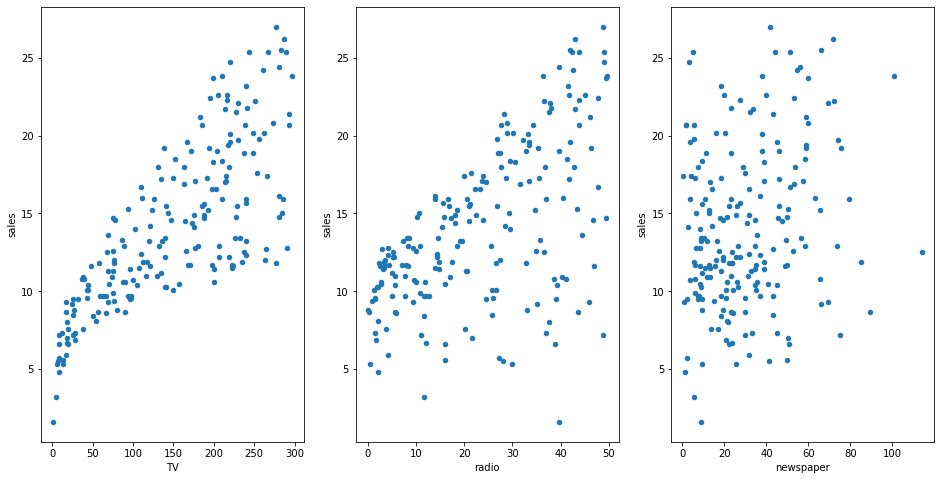

In [7]:
# visualize the relationship between the features and the response using scatterplots 
fig, axs = plt.subplots(1, 3)

data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

fig.savefig('testdata.jpg')

## Questions about the data

A generic question shall be: How the company should optimise the spends on advertising to maximise the sales?

These general questions might lead you to more specific questions:

1. What's the relationship between ads and sales?

2. How prominent is that relationship? 3. Which ad types contribute to sales?

4. How each ad contributes to sales?

5. Can sales be predicted based on the expense of the advertisement?

We will explore these questions below!

From the relationship diagrams above, it can be observed that there seems to be a linear relationship between the features TV ad, Radio ad and the sales is almost a linear one. A linear relationship typically looks like:

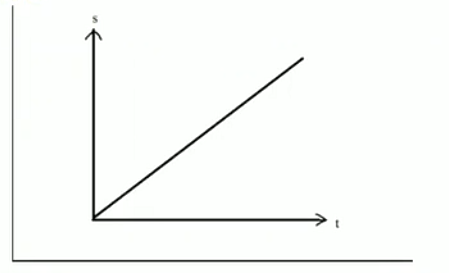

Hence, we can build a model using the Linear Regression Algorithm.

## Simple Linear Regression

https://www.desmos.com/calculator/2rnggoa6a4

Simple Linear regression is a method for predicting a quantitative response using a single feature ("input variable"). The mathematical equation is:

y =  β0 + β1x

What do terms represent?

* y is the response or the target variable
* x is the feature
* β1 is the coefficient of x
* β0 is the intercept

 β0 and β1 are the model coefficients. To create a model, we must "learn" the values of these coefficients. And once we have the value of these coefficients, we can use the model to predict the Sales!

### Estimating ("Learning") Model Coefficients

The coefficients are estimated using the least-squares criterion, i.e., the best fit line has to be calculated that minimizes the sum of squared residuals (or "sum of squared errors").

### The mathematics involved

Take a quick look at the plot created. Now consider each point, and know that each of them has a coordinate in the form (X, Y). Now draw an imaginary line between each point and the current "best-fit" line. We'll call the distance between each point and the current best-fit line as D. To get a quick image of what we're trying to visualize, take a look at the picture below:

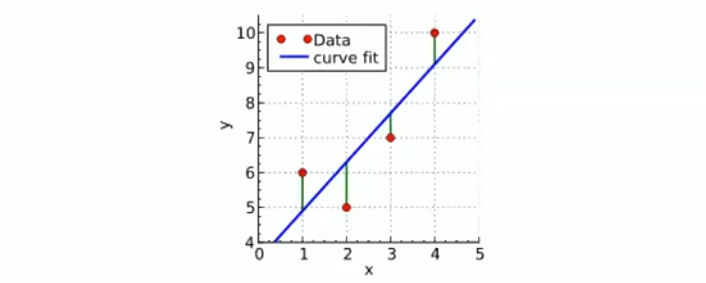

What elements are present in the diagram?

* The red points are the observed values of x and y.

* The blue line is the least squares line.

* The green lines are the residuals, which is the distance between the observed values and the least squares line.

The general equation of a straight line is:

                                                      y = mx + b

It means that if we have the value of m and b, we can predict all the values of y for corresponding x. During construction of a Linear Regression Model, the computer tries to calculate the values of m and b to get a straight line. But the question is:

**How Do you Know this is the best fit line?**

The best fit line is obtained by minimizing the residual. Residual is the distance between the actual Y and the predicted Y, as shown below:

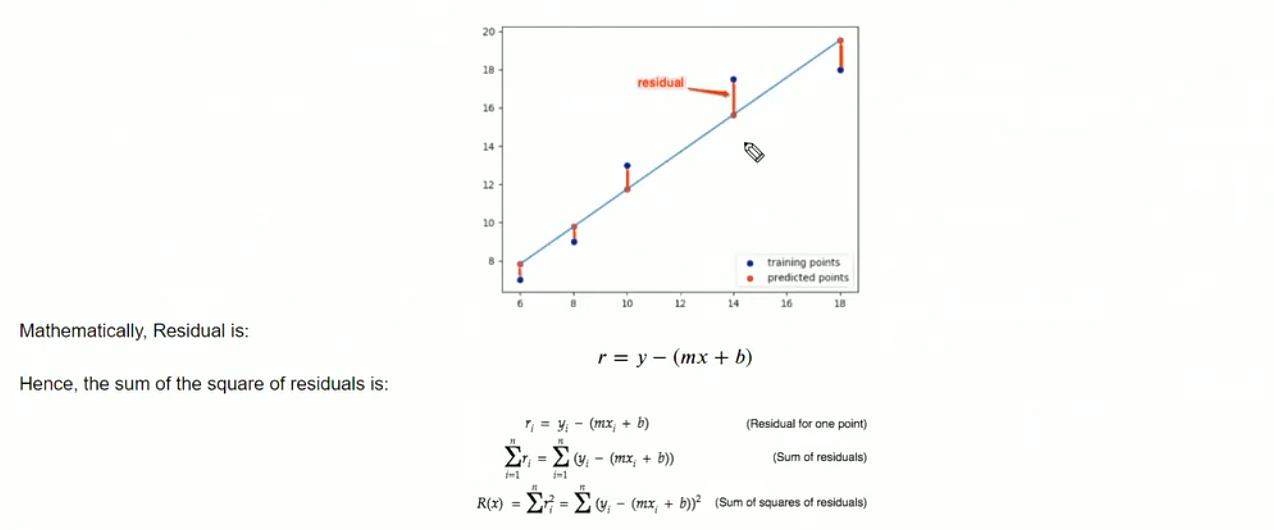

## Gradient Descent

But as the residual's minima is dependent on two variables m and b, it becomes a Paraboloid and the appropriate m and b are calculated using_* Gradient Descent*_ as shown below.

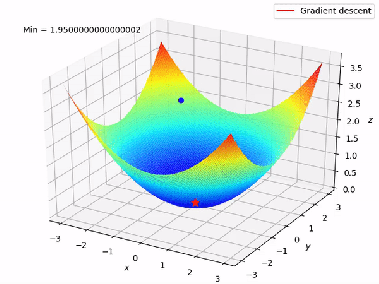

https://miro.medium.com/max/1200/0*-j3BGxc-EJDOddim



In [8]:
# create X = feature and y = Label
X = data[['TV']]
y = data.sales

#follow the usual sklearn pattern: import, instantiate, fit

from sklearn.linear_model import LinearRegression

lm =LinearRegression()

lm.fit(X, y)

LinearRegression()

In [9]:
# print intercept and coefficients

print (lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


### Interpreting the model

How do we interpret the coefficient for spends on TV ad (β1)?

* A "unit" increase in spends on a TV ad is associated with a 0.047537 "unit" increase in Sales. 
* Or, an additional $1,000 on TV ads is translated to an increase in sales by 47.53 Dollars.

As an increase in TV ad expenditure is associated with a decrease in sales, β1 would be negative.

## Prediction using the model

If the expense on TV ad is $50000, what will be the sales prediction for that market?

                                               y = β0 + β1X
                                        y= 7.032594 +0.047537 x 50

In [10]:
#calculate the prediction

7.032594 + 0.047537 * 50

9.409444

Thus, we would predict Sales of 9,409 widgets in that market.

Let's do the same thing using code.

In [11]:
# Let's create a DataFrame since the model expects it

X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [12]:
# use the model to make predictions on a new value

lm.predict(X_new)

array([9.40942557])

### How Least Squares Line changes based on input data (Just for Demo purpose)

https://www.desmos.com/calculator/jwquvmikhr

#### Hypothesis Testing and p-values

Hypothesis testing is Closely related to confidence intervals. We start with a null hypothesis and an alternate hypothesis (that is opposite to the null). Then, we check whether the data rejects the null hypothesis or falls to reject the null hypothesis.

("Failing to reject" the null hypothesis does not mean "accepting" the null hypothesis. The alternative hypothesis might indeed be true, but that we just don't

have enough data to prove that.)

The conventional hypothesis test is as follows:

* **Null hypothesis:** No relationship exists between TV advertisements and Sales (and hence β1 equals zero).

* **Alternative hypothesis:** There exists a relationship between TV advertisements and Sales (and hence, β1 is not equal to zero).

How do we test this? We reject the null hypothesis (and thus believe the alternative hypothesis) if the 95% confidence interval does not include zero. The p- value represents the probability of the coefficient actually being zero.

In [13]:
# print the p-values for the model coefficients

import statsmodels.formula.api as smf
lm=smf.ols (formula='sales~ TV', data=data).fit()
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

the 95% confidence interval includes zero, the p-value for that coefficient will be greater than 0.05. If the 95% confidence interval does not include zero, the p-value will be less than 0.05.

Thus, a p-value of less than 0.05 is a way to decide whether there is any relationship between the feature in consideration and the response or not. Using 0.05 as the cutoff is just a convention.

In this case, the p-value for TV ads is way less than 0.05, and so we believe that there is a relationship between TV advertisements and Sales.

Note that we generally ignore the p-value for the intercept.

## Model Confidence

#### How Well Does the Model Fit the data?

One of the most generic way to evaluate the fit of a linear model is by computing the R-squared value. R-squared explains theproportion of variance, i.e., the proportion of variance in the observed data which the model explains, or the reduction in error over the null model. (A null model only predicts the mean of all the observed responses, and thus it only has an intercept and no slope.)

The value of R-squared lies between 0 and 1. A value closer to 1 is better as it means that more variance is explained by the model.

## R² statistics

The R-squared statistic provides a measure of fit. It takes the form of a proportion-the proportion of variance explained and so it always takes on a value between 0 and 1. In simple words, it represents how much of our data is being explained by our model. For example, R² statistic = 0.75, it says that our model fits 75 % of the total data set. Similarly, if it is 0, it means none of the data points is being explained and a value of 1 represents 100% data explanation. Mathematically R2 statistic is calculated as:
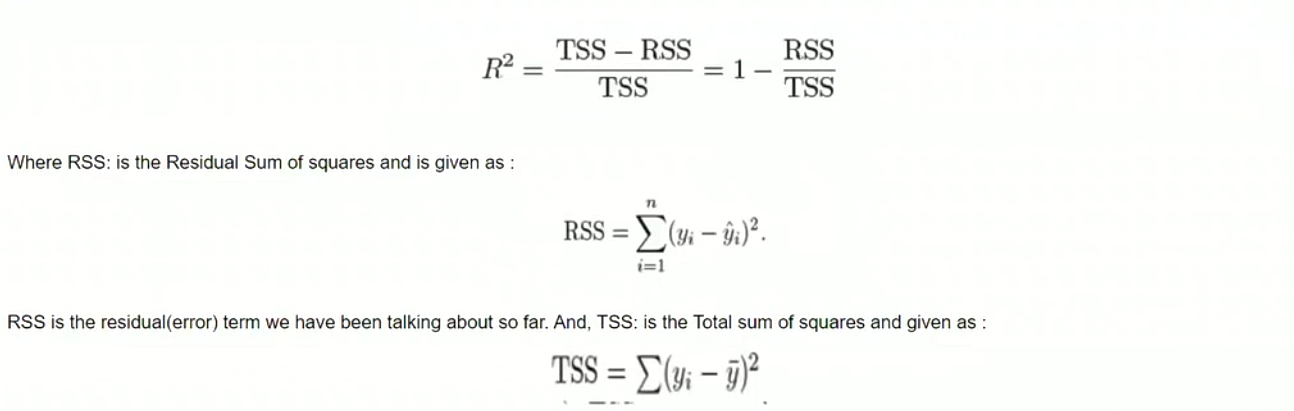

TSS is calculated when we consider the line passing through the mean value of y, to be the best fit line. Just like RSS, we calculate the error term when the best fit line is the line passing through the mean value of y and we get the value of TSS.

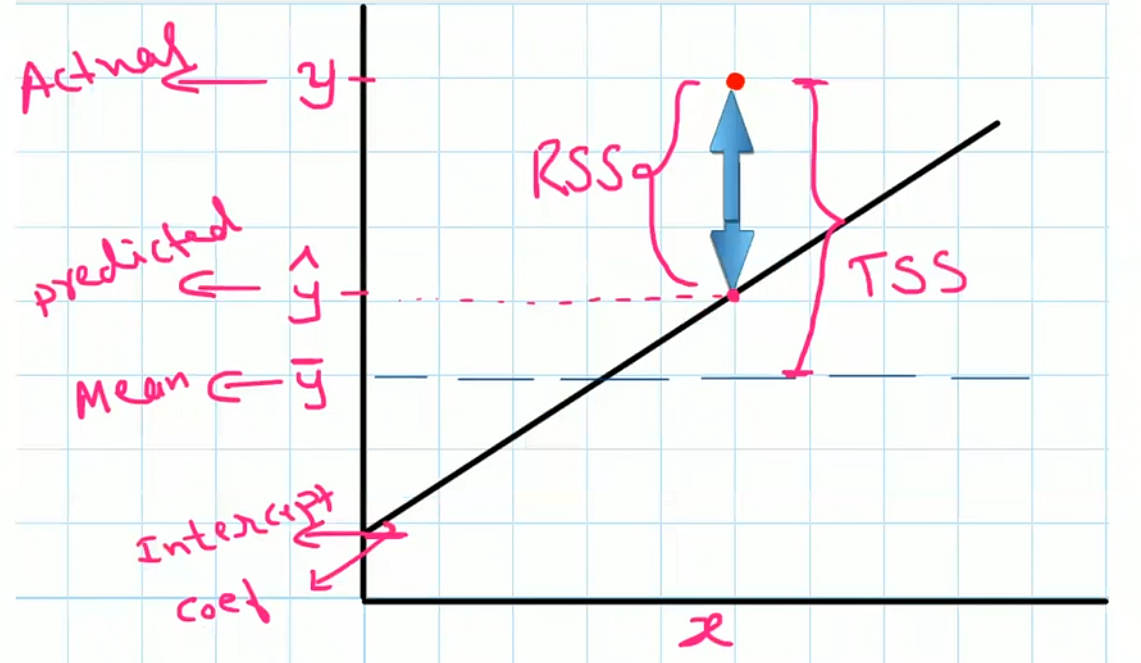

The closer the value of R2 is to 1 the better the model fits our data. If R2 comes below 0(which is a possibility) that means the model is so bad that it is performing even worse than the average best fit line.


In [14]:
#print the R-squared value for the model
lm.rsquared

0.611875050850071

## Adjusted R² statistics

As we increase the number of independent variables in our equation, the R2 increases as well. But that doesn't mean that the new independent variables have any correlation with the output variable. In other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but R2 value will increase. To rectify this problem, we use Adjusted R2 value which penalises excessive use of such features which do not correlate with the output data. Let's understand this with an example:

We can see that R2 always increases with an increase in the number of independent variables. Thus, it doesn't give a better picture and so we need Adjusted R2 value to keep this in check. Mathematically, it is calculated as:

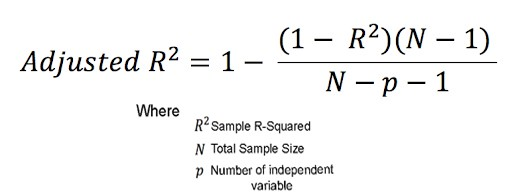

In the equation above, when p = 0, we can see that adjusted R2 becomes equal to R2. Thus, adjusted R2 will always be less than or equal to R2, and it penalises the excess of independent variables which do not affect the dependent variable.

it a "good" R-squared value? Now, that's hard to say. In reality, the domain to which the data belongs to plays a significant role in deciding the threshold for the R-squared value. Therefore, it's a tool for comparing different models.

## Multiple Linear Regression

Till now, we have created the model based on only one feature. Now, we'll include multiple features and create a model to see the relationship between those features and the label column. This is called Multiple Linear Regression.



Each x represents a different feature, and each feature has its own coefficient. In this case:

y = β0 + β1 x TV + β2 x Radio + β3 x Newspaper

Let's use Statsmodels to estimate these coefficients


In [15]:
# create X and y

X = data[[ 'TV', 'radio', 'newspaper']]
y = data.sales
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients

print('Intercept: ->',lm.intercept_)
print('TV:        ->',lm.coef_[0])
print('Radio :    ->',lm.coef_[1])
print('Newspaper: ->',lm.coef_[2])

Intercept: -> 2.9388893694594067
TV:        -> 0.04576464545539761
Radio :    -> 0.18853001691820462
Newspaper: -> -0.0010374930424762972


How do we interpret these coefficients? If we look at the coefficients, the coefficient for the newspaper spends is negative. It means that the money spe

newspaper advertisements is not contributing in a positive way to the sales. A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [16]:
lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        14:20:56   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are the things to be learnt from this summary?

* TV and Radio have positive p-values, whereas Newspaper has a negative one. Hence, we can reject the null hypothesis for TV and Radio that there is no relation between those features and Sales, but we fail to reject the null hypothesis for Newspaper that there is no relationship between newspaper spends and sales.

* The expenses on bot TV and Radio ads are positively associated with Sales, whereas the expense on newspaper ad is slightly negatively associated with the Sales.

* This model has a higher value of R-squared (0.897) than the previous model, which means that this model explains more variance and provides a better fit to the data than a model that only includes the TV.

Feature Selection

How do I decide which features have to be included in a linear model? Here's one idea:

* Try different models, and only keep predictors in the model if they have small p-values.

* Check if the R-squared value goes up when you add new predictors to the model.

What are the drawbacks in this approach? -If the underlying assumptions for creating a Linear model(the features being independent) are violated(which usually is the case). p-values and R-squared values are less reliable.

* Using a p-value cutoff of 0.05 means that adding 100 predictors to a model that are pure noise, still 5 of them (on average) will be counted as significant.
* R-squared is susceptible to model overfitting, and thus there is no guarantee that a model with a high R-squared value will generalise. Following is an example:

In [17]:
# only include TV and Radio in the model  
lm = smf.ols(formula='sales ~ TV+ radio', data=data).fit()
lm.rsquared

0.8971942610828957

In [18]:
# add Newspaper to the model (which we believe has no association with Sales) 
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

Selecting the model with the highest value of R-squared is not a correct approach as the value of R-squared shall always increase whenever a new feature is taken for consideration even if the feature is unrelated to the response.

The alternative is to use adjusted R-squared which penalises the model complexity (to control overfitting), but this again generally under-penalizes complexity.

a better approach to feature selection is Cross-validation. It provides a more reliable way to choose which of the created models will best generalise as it better estimates of out-of-sample error. An advantage is that the cross-validation method can be applied to any machine learning model and the scikit-learn package provides extensive functionality for that.

# Project_1 with Linear Regression

### Problem Statement

**We need to predict the chance of admission based on the students various scores.**

**Features or Independent variables**

* GRE Score

* TOEFL Score

* University Rating

* SOP

* LOR

* CGPA

* Research

### Label/Target

* Chance of Admit

In [19]:
#Let's start with importing necessary Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [20]:
# Read csv file and convert into dataframe

data =pd.read_csv('G:\datatrained\Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [21]:
data.shape

(500, 9)

In [22]:
# Understand data at high Level. Check the statistics of data set
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [23]:
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [24]:
# Fill the null values

data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna (data['TOEFL Score'].mean())
data['GRE Score'] = data['GRE Score'].fillna (data['GRE Score'].mean())

In [25]:
# Verify if NaN's are filled
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Now the data looks good and there are no missing values. Also, the first cloumn is just serial numbers, so we don' need that column. Let's drop it from data and make it more clean.

In [26]:
# Dropping unwanted columns
data = data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


Let's visualize the data and analyze the relationship between independent and dependent variables:

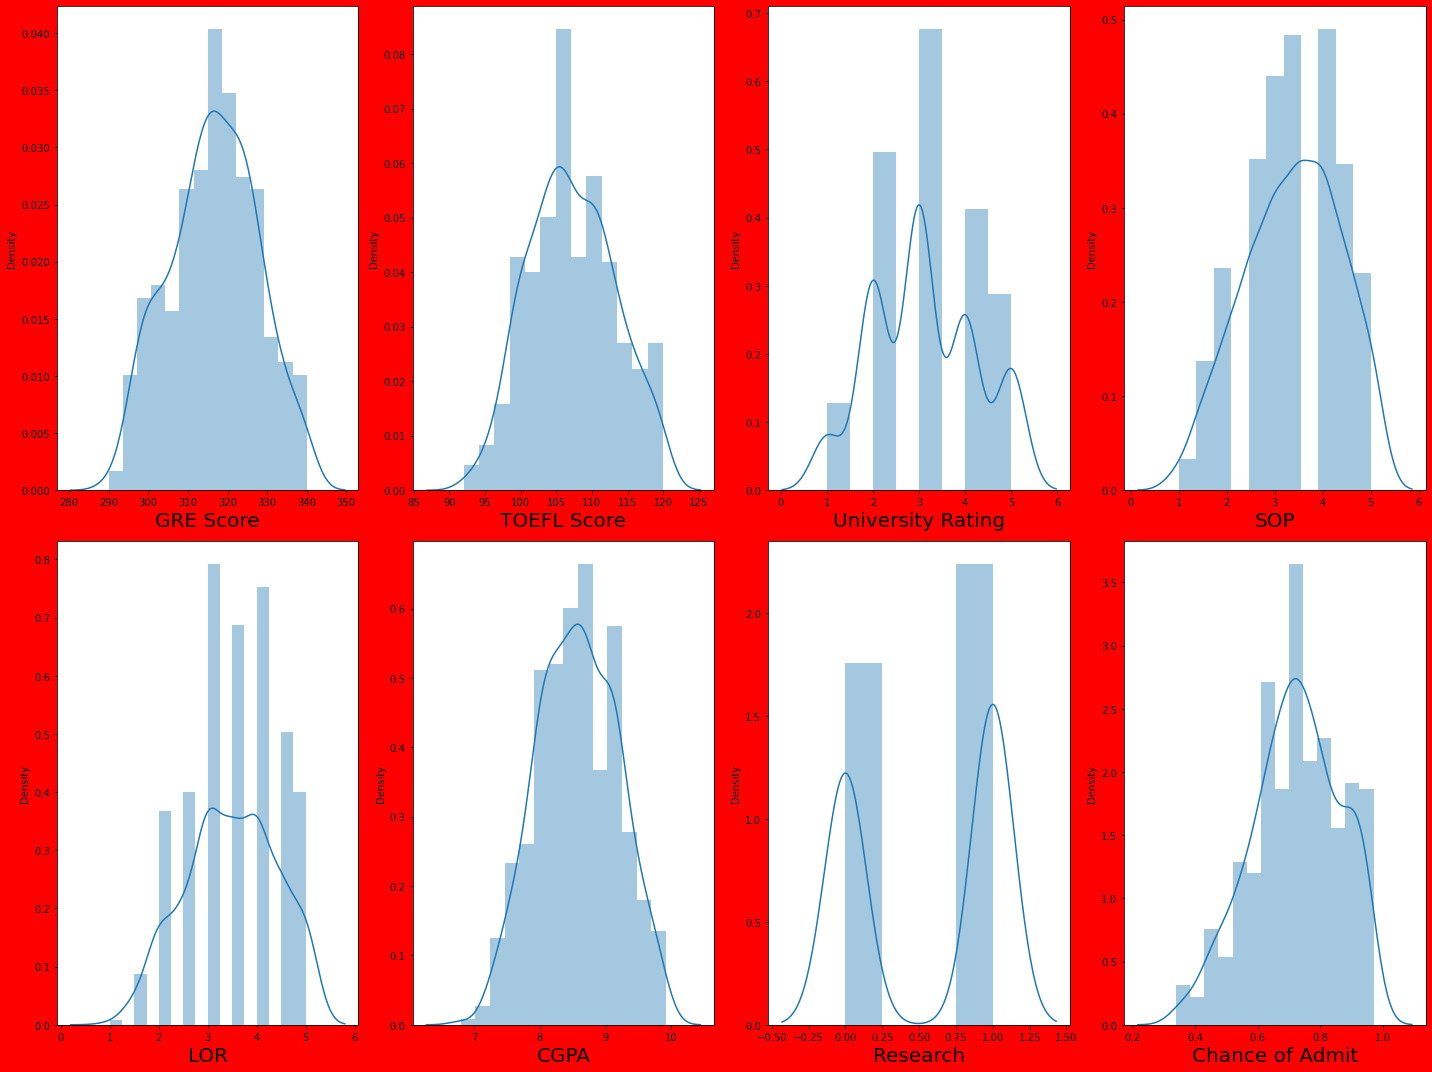

In [27]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20, 15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber) 
        sns.distplot(data[column]) 
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead!

Let's observe the relationship between independent variables and dependent variable.

In [28]:
# Divide data set into features and Label

y = data['Chance of Admit']
X = data.drop(columns = ['Chance of Admit'])

In [29]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [30]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


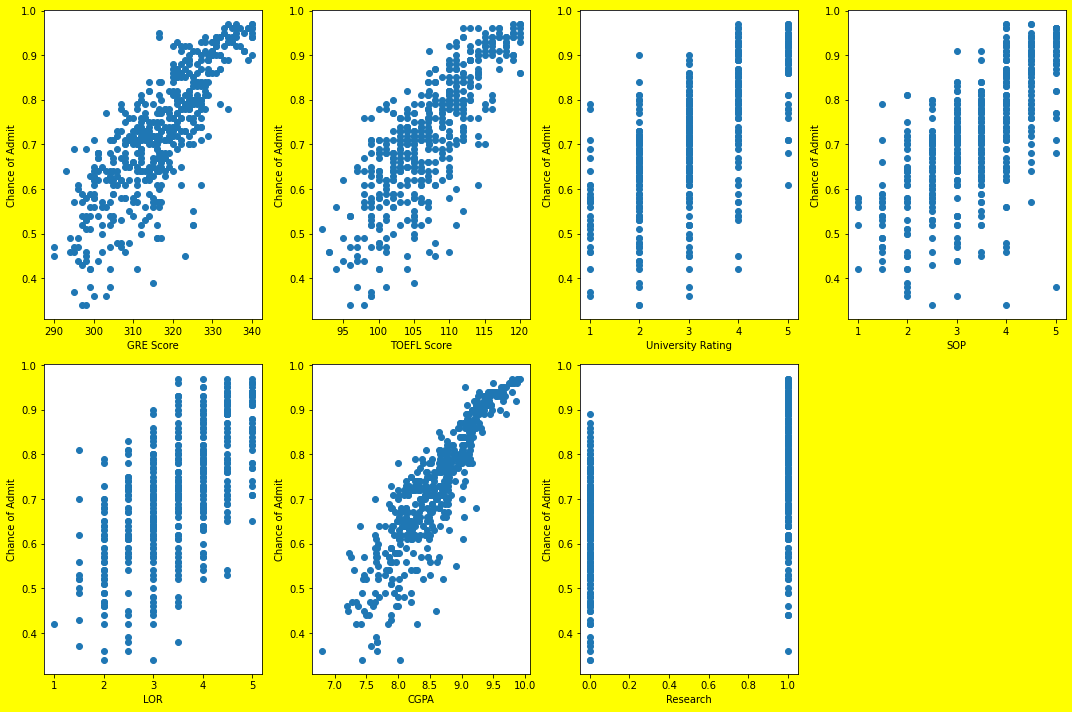

In [31]:
# Visualizing relationship
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1

for column in X:
    if plotnumber<=8 :
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Chance of Admit', fontsize=10)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear. Thus, our linearity assumption is satisfied.

In [32]:
# Data Scaling. Formula  Z = (X mean)/std

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

**Example for StandardScaler**

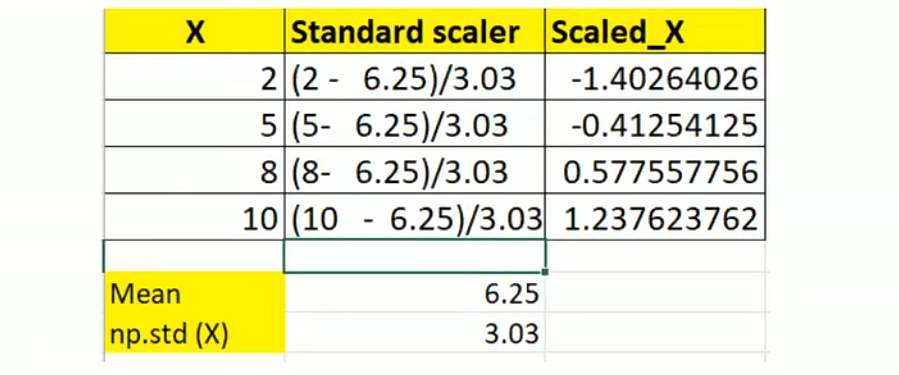

Let's go ahead and use linear regression and see how good it fits our data. But first. let's split our data in train and test.

**Train Test Split**

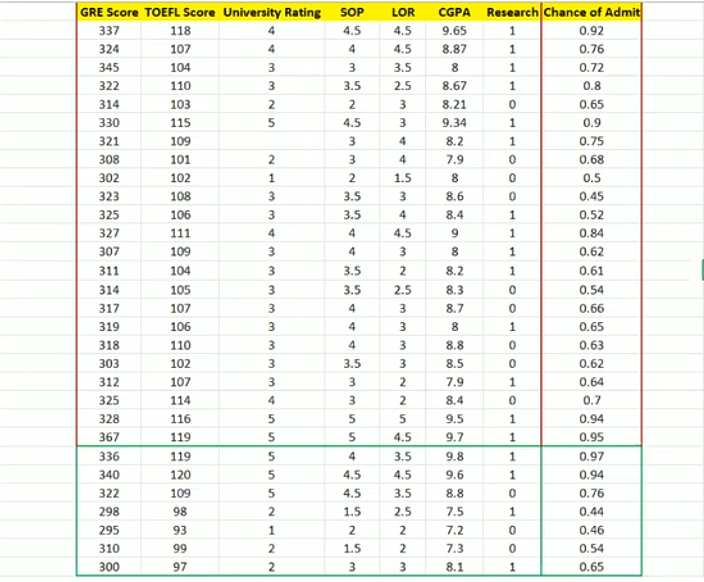

In [34]:
# Split data into train and test. Model will be built on training data and tested on test data. 
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state=49)
y_train.head()

401    0.66
221    0.75
110    0.61
76     0.74
195    0.78
Name: Chance of Admit, dtype: float64

## Model instantiating and training

In [35]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

### Predict the chance of admission given features

In [36]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [37]:
# Since we have already fit the scaler, you can transform the data
print ('Chance of Admission is:',regression.predict(scaler.transform([[312.0, 103.0, 4.0, 4.0, 5.0, 8.43, 0]])))

Chance of Admission is: [0.70551753]


### You can save the model and later you can use it for prediction

In [38]:
 # saving the model to the Local file system
filename = 'finalized_model.pickle'
pickle.dump (regression,open(filename,'wb'))

# prediction using the saved model
loaded_model = pickle.load(open(filename,'rb'))

a=loaded_model.predict(scaler.transform([[314,103,2,2,3,8.21,0]]))

a

array([0.62816808])

In [39]:
# Adjusted R2 score
regression.score(x_train,y_train)

0.8145910304382725

### Let's check how well model fits the test data.

In [40]:
regression.score(x_test,y_test)

0.8377796652353541

### Let's plot and visualize

In [41]:
y_pred = regression.predict(x_test)

In [42]:
y_pred

array([0.77592728, 0.82189355, 0.53237459, 0.53158915, 0.71913576,
       0.78296644, 0.67493981, 0.71765858, 0.95026714, 0.51343088,
       0.82749034, 0.65490214, 0.65336809, 0.69515263, 0.67870849,
       0.68422187, 0.77066709, 0.69587358, 0.61306985, 0.91270759,
       0.83613353, 0.5101666 , 0.62095565, 0.90970737, 0.67081486,
       0.91154893, 0.52166984, 0.61229555, 0.85070914, 0.83034104,
       0.50493884, 0.73415525, 0.76966228, 0.61102598, 0.79870804,
       0.58112644, 0.75399139, 0.84620015, 0.86249992, 0.75216791,
       0.65235971, 0.96012442, 0.66118549, 0.6427768 , 0.6556939 ,
       0.50748275, 0.68440277, 0.61035881, 0.51200968, 0.73397561,
       0.76162862, 0.89663454, 0.58197652, 0.9320727 , 0.59682293,
       0.71741367, 0.94389341, 0.76641482, 0.59803781, 0.78678587,
       0.76864083, 0.69049847, 0.74159936, 0.85564167, 0.77807617,
       0.74212136, 0.69536291, 0.73242447, 0.99167787, 0.96534931,
       0.66420324, 0.65200556, 0.75069108, 0.73163753, 0.67942

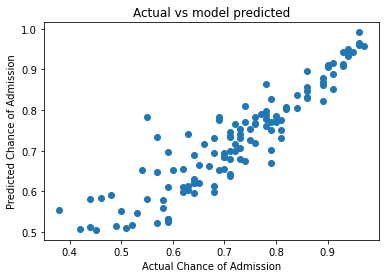

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission')
plt.title('Actual vs model predicted')
plt.show()

## Model Evaluation

* `Mean absolute error (MAE)`: Represents average error

* `Mean squared error (MSE)`: Similar to MAE but noise is exaggerated and larger errors are "punished". It is harder to interpret than MAE as it's not in base units, however, it is generally more popular.

* `Root mean squared error (RMSE)`. Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it's in base units. It is recommended that RMSE be used as the primary metric to interpret your model.

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
y_pred = regression.predict(x_test)

In [46]:
mean_absolute_error(y_test,y_pred)

0.039094962124450475

In [47]:
mean_squared_error(y_test,y_pred)

0.0030559237967637495

In [48]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.05528041060596194

## You have succesfully completed building Linear Regression model

Now let's check if our model is overfitting our data using regularization.

Let's see if our model is overfitting our training data.

## Regularization

When we use regression models to train some data, there is a good chance that the model will overfit the given training data set. Regularization helps sort this overfitting problem by restricting the degrees of freedom of a given equation i.e. simply reducing the number of degrees of a polynomial function by reducing their corresponding weights.

In a linear equation, we do not want huge weights/coefficients as a small change in weight can make a large difference for the dependent variable (Y). So, regularization constraints the weights of such features to avoid overfitting.

To regularize the model, a Shrinkage penalty is added to the cost function. Let's see different types of regularizations in regression:

* LASSO
* RIDGE
* ELASTICNET (Less popular)


### LASSO(Least Absolute Shrinkage and Selection Operator) Regression (L1 Form)**

LASSO regression penalizes the model based on the sum of magnitude of the coefficients. The regularization term is given by
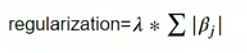

Where, lambda  is the shrinkage factor.


### Ridge Regression (L2 Form)


Ridge regression penalizes the model based on the sum of squares of magnitude of the coefficients. The regularization term is given by

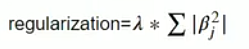

Where, lambda is the shrinkage factor.

#### Difference between Ridge and Lasso

Ridge regression shrinks the coefficients for those predictors which contribute very less in the model but have huge weights, very close to zero. But it never makes them exactly zero. Thus, the final model will still contain all those predictors, though with less weights. This doesn't help in interpreting the model very well. This is where Lasso regression differs with Ridge regression. In Lasso, the L1 penalty does reduce some coefficients exactly to zero when we use a sufficiently large tuning parameter A. So, in addition to regularizing, lasso also performs feature selection.

#### Why use Regularization?

Regularization helps to reduce the variance of the model, without a substantial increase in the bias. If there is variance in the model that means that the model won't fit well for dataset different than training data. The tuning parameter λ controls this bias and variance tradeoff. When the value of λ is increased up to a certain limit, it reduces the variance without losing any important properties in the data. But after a certain limit, the model will start losing some important properties which will increase the bias in the data. Thus, the selection of good value of λ is the key. The value of λ is selected using cross-validation methods. A set of λ is selected and cross-validation error is calculated for each value of λ and that value of λ is selected for which the cross-validation error is minimum.

In [49]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

#### Lasso Regularization

In [50]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividing by the L2-norm
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [51]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

2.4249979092466713e-05

In [52]:
#now that we have best parameter, Let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso (alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=2.4249979092466713e-05)

In [53]:
lasso_reg.score(x_test, y_test)

0.8377701661591364

#### Using Ridge regression model

In [54]:
# RidgeCV will return best alpha and coefficients after performing 18 cross validations.
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [55]:
ridgecv.alpha_

0.020999999999999998

In [56]:
ridge_model = Ridge (alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.020999999999999998)

In [57]:
ridge_model.score(x_test,y_test)

0.8377744626802441

We got around same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.

**Let's see the underlying assumptions:-**

* The regression model is linear in terms of coefficients and error term.

* The mean of the residuals is zero.

* The error terms are not correlated with each other, i.e. given an error value; we cannot predict the next error value.

* No Multicollinearity, i.e. no independent variables should be correlated with each other or affect one another. If there is multicollinearity, the precision of prediction by the OLS model decreases.

* The error terms are normally distributed.